In [1]:
# loading all required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

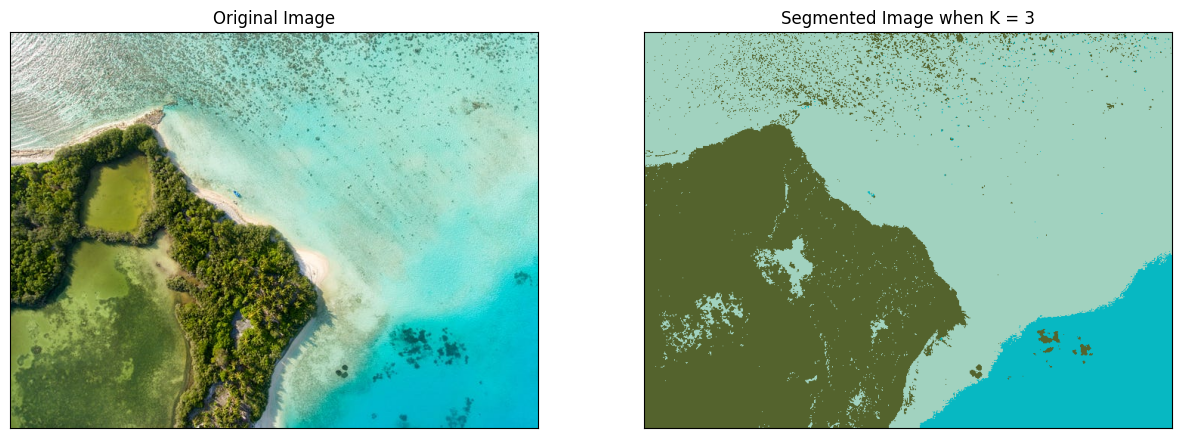

In [2]:
# load the image in RGB color space
original_image = cv2.imread("/content/1_NPWZVvTqyEBQr8rBmsbm2g.jpg")
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)

# convert M*N*3 image into a K*3 matrix
vectorized = img.reshape((-1,3))

# convert the unit8 values to float
vectorized = np.float32(vectorized)

# cluster with k = 3, criteria is the iteration termination criteria, algorithm when it is satisfied
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()
